In [812]:
import numpy as np
import matplotlib.pyplot as plt

In [813]:
import os
import shutil
import time

In [814]:
dir_save = "../../.saves/" + "C decaying driving a=-2 b=1 beta0 = 1 L = 1000/" 

We expect $\delta u_k = 1-u_k(\chi)$ to go zero as $$\delta u_k \simeq \mu_0^2 \frac{e^{-\chi'^2}}{\chi'}$$

So, from this asymptotic behaviour, we can extimate $\alpha(t)$

Let $y = (x-x_c)$ and $g(y) = \log \delta u_k$, then

$$\partial_y g(y) = -b\alpha^2 - \frac{1}{2y}$$

So we can extimate

$$\alpha(t) \simeq \sqrt{-\frac{1}{b}(\frac{\Delta g}{\Delta y} + \frac{1}{2\bar{y}})}$$

Where
$$\Delta g = g(y_2) - g(y_1)$$
$$\Delta y = y_2-y_1$$
$$\bar{y} = (y_2+y_1)/2$$

In [815]:
b_ = 1
a_ = -2
beta0 = 1
alpha0 = beta0/np.sqrt(b_)
#alpha0 = 1/np.sqrt(2)   # C_ini = 1 constant
def alpha(alpha0, t):
    t0 = 1/(2*a_*alpha0**2)
    return np.sign(alpha0)/np.sqrt(2*a_*(t0-t))
def beta(beta0, t):
    alpha0 = beta0/np.sqrt(b_) # Same sign chosen
    return np.sqrt(b_)*alpha(alpha0, t)

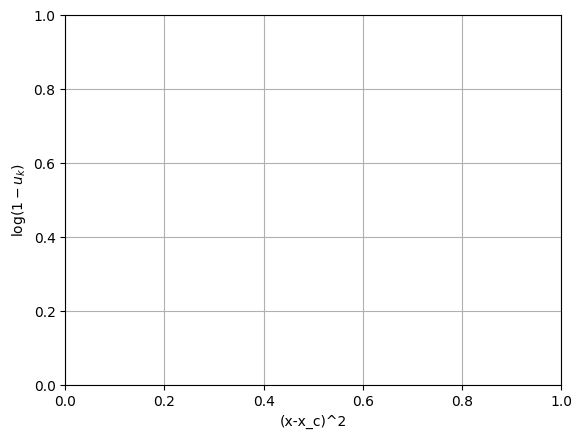

In [816]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("(x-x_c)^2")
ax.set_ylabel("$\log(1 - u_k)$")
ax.set_yscale("linear")
ax.grid()

In [817]:
# We're going to compare the analytical expected alpha and the one form simulations
alpha_extimates = [] # Tail Slope
alpha_anal = []
beta_extimates = []  # Plateau
beta_anal = []
ts = []

../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325066200
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325066263
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325105176
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325137117
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325179477
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325229279
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710326098038


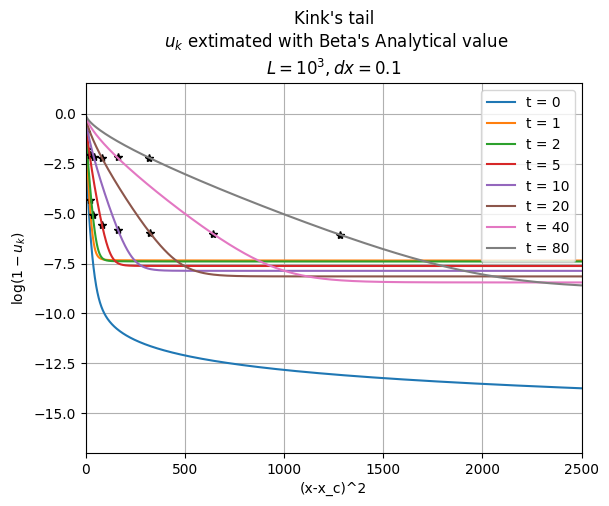

In [818]:
# Get all the simulations in the selected folder
# Rescale x->\chi and u->u_k with the ANALYTICAL expressions for alpha, beta
# Plot in the same canvas WITH the NDSolve solution for the u_k ODE
tinitial = 10

# Plot region
xmin = 500
xmax = 550

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    x = np.zeros(N)
    u = np.zeros(N)
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            u[i-1] = -float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            #print(tmax)
            tmax = float(tmax) - tinitial
            dx = float(dx)
            L = N*dx
        i = i + 1

    x = x[0:i-1]
    u = u[0:i-1]

    N = int(N)

    beta_ = u[int(0.75*N)]       # You can extimate beta as the plateau value
    beta_extimates.append(beta_)
    beta_ = beta(beta0, tmax)   # BUT we use Analytical value to extimate u_k

    y = np.zeros(N)     # y = (x-x_c)**2 with x > x_c
    for i in np.arange(0,N):
        y[i] = np.sign(x[i]-x[int(N/2)])*(x[i]-x[int(N/2)])**2
    u_k = u/beta_
    
    g = np.log(1-u_k)
    ### Slope extimation (alpha extimation)
    y1 = (1/alpha(alpha0, tmax))**2
    y2 = (2/alpha(alpha0, tmax))**2
    #y1 = 20000    # Point of g(y) where extimate the slope (derivative)
    #y2 = 30000
    x1 = np.sqrt(y1) + L/2
    x2 = np.sqrt(y2) + L/2
    index1 = int(x1/dx)
    index2 = int(x2/dx)

    # Plot "FIT region"
    ax.plot([y1, y2], [g[index1], g[index2]], "*", color="black")

    Delta_g = g[index2] - g[index1]
    Delta_y = y2 - y1
    y_ave = (y1+y2)/2
    alpha_extimates.append(np.sqrt((-1/b_)*(Delta_g/Delta_y + 1/(2*y_ave))))

    alpha_anal.append(alpha(alpha0, tmax))
    beta_anal.append(beta(beta0, tmax))
    ts.append(tmax)


    f.close()
    
    # Label with the state's time
    state_time = tmax 
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    # Get custom label of the curve
    f = open(dir + "/label.dat", "r")
    temp_label = f.readline().strip('\n')
    if temp_label != "": 
        labell = temp_label
    f.close()

    ax.plot(y, g, label = labell)

ax.set_xlim((xmin-L/2)**2,(xmax-L/2)**2)
ax.legend()
#ax.set_ylim(-2)


title = "Kink's tail\n $u_k$ extimated with Beta's Analytical value\n$L=10^3, dx = 0.1$"
ax.set_title(title)
fig

Let's compare the extimated values of $\alpha(t)$ with the analytical expression.

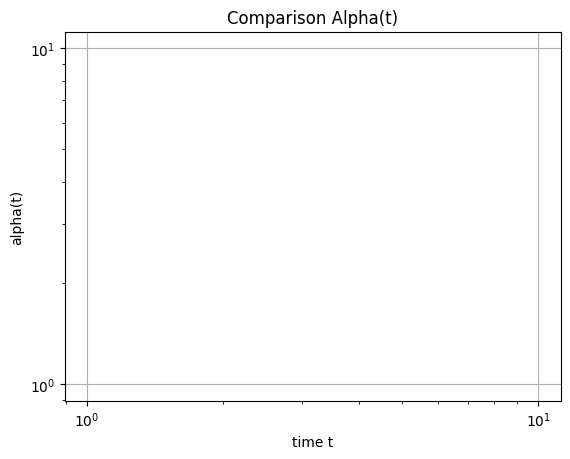

In [819]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("time t")
ax.set_ylabel("alpha(t)")
title = "Comparison Alpha(t)"
ax.set_title(title)
ax.grid()

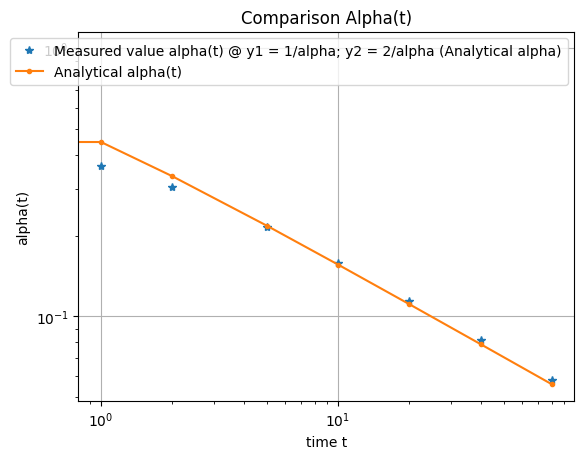

In [820]:
# Compare analytical beta with simulation plateau
ax.plot(ts, alpha_extimates, '*', label = "Measured value alpha(t) @ y1 = 1/alpha; y2 = 2/alpha (Analytical alpha)")
ax.plot(ts, alpha_anal, '.-', label = "Analytical alpha(t)")

#ax.set_xlim(-3,3)
#ax.set_ylim(-0.6, 0.6)


ax.legend()
fig

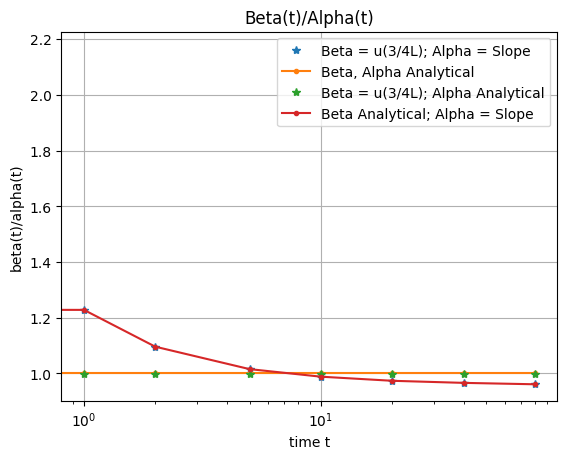

In [821]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("linear")
ax.set_xlabel("time t")
ax.set_ylabel("beta(t)/alpha(t)")
title = "Beta(t)/Alpha(t)"
ax.set_title(title)
ax.grid()

ratio = []
ratio_anal = []
ratio_mix = []
ratio_mix2 = []
for i in np.arange(0,len(ts)):
    ratio.append(float(beta_extimates[i])/float(alpha_extimates[i]))
    ratio_anal.append(float(beta_anal[i])/float(alpha_anal[i]))
    ratio_mix.append(float(beta_extimates[i])/float(alpha_anal[i]))
    ratio_mix2.append(float(beta_anal[i])/float(alpha_extimates[i]))

ax.plot(ts, ratio, '*', label = "Beta = u(3/4L); Alpha = Slope")
ax.plot(ts, ratio_anal, '.-', label = "Beta, Alpha Analytical")
ax.plot(ts, ratio_mix, '*', label = "Beta = u(3/4L); Alpha Analytical")
ax.plot(ts, ratio_mix2, '.-', label = "Beta Analytical; Alpha = Slope")
ax.legend()
#ax.axvline(10, color="black")
#ax.set_xlim(10)
#ax.set_ylim(-0.6, 0.6)

Now let's use the alpha extimations / analytical expression for $\alpha(t)$ to rescale x axis (to get $\chi$) and plot the simulated data (v.s. $\chi^2$) and, on the same canvas, the NDSolve numerical solution.

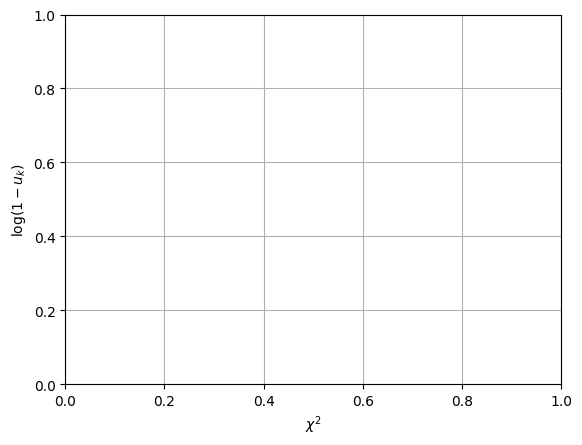

In [822]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("$\chi^2$")
ax.set_ylabel("$\log(1 - u_k)$")
ax.set_yscale("linear")
ax.grid()

../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1
1.0
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325066200
0.4472135954999579
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325066263
0.3333333333333333
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325105176
0.2182178902359924
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325137117
0.15617376188860607
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325179477
0.1111111111111111
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710325229279
0.07881104062391006
../../.saves/C decaying driving a=-2 b=1 beta0 = 1 L = 1000/1710326098038
0.05581455721859476


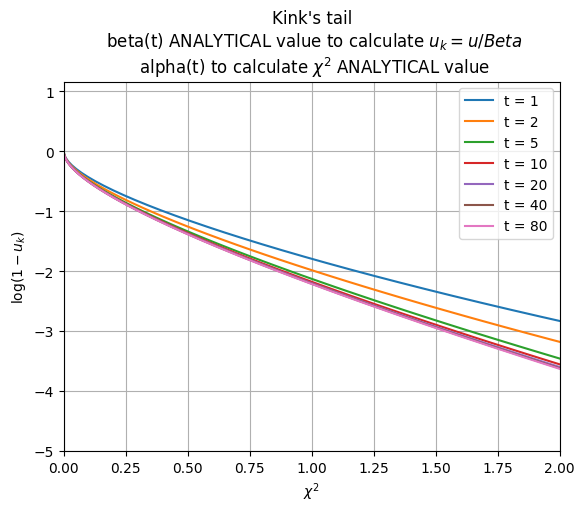

In [823]:
# Get all the simulations in the selected folder
# Rescale x->\chi and u->u_k with the ANALYTICAL expressions for alpha, beta
# Plot in the same canvas WITH the NDSolve solution for the u_k ODE
tinitial = 10

file_index = 0
for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    x = np.zeros(N)
    u = np.zeros(N)
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            u[i-1] = -float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            tmax = float(tmax) - tinitial
            dx = float(dx)
            L = N*dx
        i = i + 1

    x = x[0:i-1]
    u = u[0:i-1]

    N = int(N)

    beta_ = u[N-int(N/4)] # Extimate beta as the plateau value
    beta_ = beta(beta0, tmax)

    y = np.zeros(N)     # y = (x-x_c)**2 with x > x_c
    for i in np.arange(0,N):
        y[i] = np.sign(x[i]-x[int(N/2)])*(x[i]-x[int(N/2)])**2
    u_k = u/beta_
    
    g = np.log(1-u_k)

    ### Rescale y->\chi^2
    alpha_t = alpha_anal[file_index]
    chi2 = alpha_t**2*y
    print(alpha_t)
    file_index = file_index + 1

    f.close()
    
    # Label with the state's time
    state_time = tmax 
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    # Get custom label of the curve
    f = open(dir + "/label.dat", "r")
    temp_label = f.readline().strip('\n')
    if temp_label != "": 
        labell = temp_label
    f.close()

    if tmax > 0:
        ax.plot(chi2, g, label = labell)

ax.set_xlim(0,2)
ax.legend()
ax.set_ylim(-5)


title = "Kink's tail\n beta(t) ANALYTICAL value to calculate $u_k=u/Beta$\n alpha(t) to calculate $\chi^2$ ANALYTICAL value"
ax.set_title(title)
fig

/tmp/ipykernel_5111/257215840.py:26: RuntimeWarning: invalid value encountered in log
  g1 = np.log(1-u_k1)


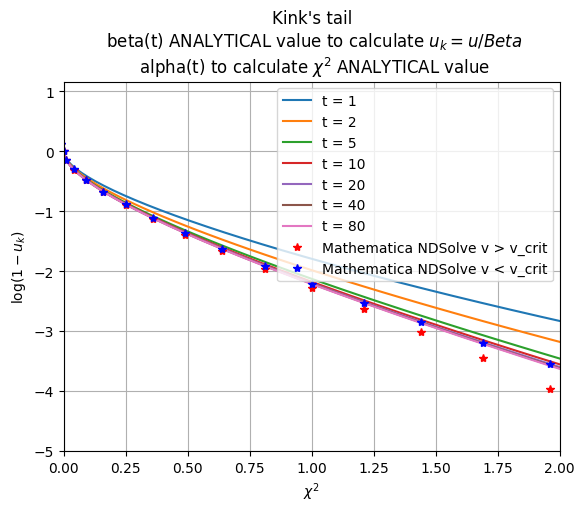

In [824]:
# Plot NDsolve u_k tail

# Read the numerical solution of the ODE
f1 = open("../../misc/NDSolve u_k ODE a=-2 vel=1.33.dat", "r")
f2 = open("../../misc/NDSolve u_k ODE a=-2 vel=1.32.dat", "r")
N = 1000000000
chi = np.zeros(N)
u_k1 = np.zeros(N)
u_k2 = np.zeros(N)
i = 0
for row in f1:
    a, b = row.split("	")
    chi[i] = float(a)/np.sqrt(b_)   # Because \chi' = b^0.5 \chi
    u_k1[i] = float(b)
    i = i + 1
i = 0
for row in f2:
    a, b = row.split("	")
    chi[i] = float(a)/np.sqrt(b_)   # Because \chi' = b^0.5 \chi
    u_k2[i] = float(b)
    i = i + 1

chi = chi[0:i-1]
u_k1 = u_k1[0:i-1]
u_k2 = u_k2[0:i-1]
g1 = np.log(1-u_k1)
g2 = np.log(1-u_k2)
chi2 = np.zeros(len(chi))
for i in np.arange(0, len(chi2)):
    chi2[i] = chi[i]**2*np.sign(chi[i])

ax.plot(chi2, g1, '*', color = "red", label = "Mathematica NDSolve v > v_crit")
ax.plot(chi2, g2, '*', color = "blue", label = "Mathematica NDSolve v < v_crit")


ax.legend()
fig